In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas.io.parsers import read_csv

In [2]:
def lee_csv(filename):
    valores = read_csv(filename, header= None).values
    return valores.astype(float)

In [3]:
def hipotesis(x, theta0, theta1):
    return theta0 + theta1*x

In [4]:
def dibuja_hipotesis(X, Y, theta0, theta1):
    X_aux = np.linspace(min(X), max(Y))
    Y_aux = hipotesis(X_aux, theta0, theta1)
    plt.plot(X_aux, Y_aux, '-')

In [5]:
def descenso_gradiente(X, Y, theta0, theta1, num_muestras, alpha = 0.01, iteraciones = 1500):
    #Nos vamos acercando iterativamente al valor de theta
    #que minimiza la función de coste J
    #Hay que computar el valor de la hipótesis en cada iteración
    #utilizando los valores de los parámetros thetaj obtenidos en 
    #la iteración anterior
    sumatorio0 = 0.0 #Sumatorio desde 1 hasta m
    sumatorio1 = 0.0
    coste_aux = funcion_coste(X, Y, theta0, theta1, num_muestras)
    #print('Coste antes: ' + str(coste_antes))
    

        
    for j in range(0, iteraciones):
        for i in range(num_muestras):
            sumtemp0 = sumatorio0 + (hipotesis(X[i], theta0, theta1) - Y[i])
            sumtemp1 = sumatorio1 + ((hipotesis(X[i], theta0, theta1) - Y[i])*X[i])
            sumatorio0 = sumtemp0
            sumatorio1 = sumtemp1
        coste_aux_aux = coste_aux
        temp0 = theta0 - alpha*(1/num_muestras)*sumatorio0
        temp1 = theta1 - alpha*(1/num_muestras)*sumatorio1
        theta0 = temp0
        theta1 = temp1
        coste_aux = funcion_coste(X, Y, theta0, theta1, num_muestras)
        sumtemp0 = sumtemp1 = sumatorio0 = sumatorio1 = 0.0
        #if(coste_aux < coste_aux_aux):
            #print('Coste incorrecto! Iteracion: ' + str(j))
        #print('theta0: ' + str(theta0) + ' theta1: ' + str(theta1))
        #print('Coste durante iteracion ' + str(j) + ': ' + str(coste_aux))
    dibuja_hipotesis(X, Y, theta0, theta1)
    
    return theta0, theta1

In [6]:
def funcion_coste(X, Y, theta0, theta1, num_muestras):
    sumatorio = 0.0 #Sumatorio desde 1 hasta m
    for i in range(1, num_muestras):
        sumatorio = sumatorio + (hipotesis(X[i], theta0, theta1) - Y[i])**2
        
    return (1/(2*num_muestras))*sumatorio    

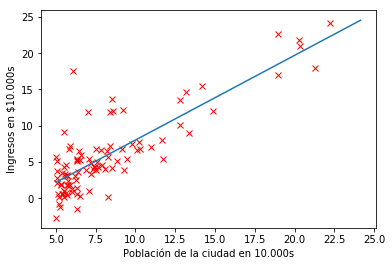

In [7]:
datos_Fichero = lee_csv('ex1data1.csv')
filas = list(datos_Fichero)
num_muestras = len(filas)
vX = []
vY = []
for i in range(0, num_muestras):
    vX.append(float(filas[i][0])) #Población
    vY.append(float(filas[i][1])) #Beneficios de la distribución en distintas ciudades

#Primera gráfica
plt.plot(vX, vY, 'x', color = 'red')
plt.xlabel('Población de la ciudad en 10.000s')
plt.ylabel('Ingresos en $10.000s')

theta0 = theta1 = 0.0
theta0, theta1 = descenso_gradiente(vX,vY, theta0, theta1, num_muestras)


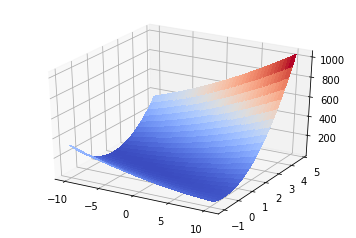

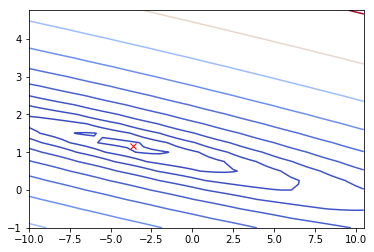

In [10]:
thetas0 = np.arange(-10, 11, 0.5)
thetas1 = np.arange(-1, 5, 0.25)
thetas0, thetas1 = np.meshgrid(thetas0, thetas1)
costes = funcion_coste(vX, vY, thetas0, thetas1, num_muestras)
fig = plt.figure()
ax = fig.gca(projection = '3d')

CosteFuncion3D = ax.plot_surface(thetas0, thetas1, costes, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#Función de coste en 2d
cont = plt.figure()
plt.contour(thetas0, thetas1, costes, np.logspace(-2,3,20), cmap=cm.coolwarm)
plt.plot(theta0, theta1, 'x', color= 'red')